Bolded text = **do not change**

Italics text = *replace with your own words*


******************
*******************

# **Description of data**

 The dataset I am looking at is called the Heart Attack Analysis & Prediction Dataset, and I imported it with the heart.csv file. This dataset considers various factors such as an individual's age, sex, and resting blood pressure (among others) to ultimately determine whether or not they have a greater chance of a heart attack. My analysis of the data involved fitting various models in order to find the most accurate set of predictors of whether or not an individual has a greater or lesser (1 or 0, respectively) chance of a heart attack.


*******************
*******************
# **Libraries**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics

*******************
*******************
# **Functions used in notebook**

*If you write a function to help with any of your sections, please put that function here*

In [2]:
# Functions that you develop
def remove_outliers(df):

  """
  this function will remove outliers. Takes in a dataframe. Uses the IQR method and returns the dataframe without outliers.
  input: df
  output: df w/o outliers
  """
  meanval = np.mean(df)
  stdval = np.std(df)
  upper = meanval + stdval * 2
  lower = meanval - stdval * 2
  return np.where((df > lower) & (df < upper), df, np.nan)

def model_data(X,y):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1)

  model = LinearRegression(fit_intercept=True)
  model.fit(Xtrain,ytrain)
  
  print('Training R^2',model.score(Xtrain,ytrain))
  print('Testing R^2',model.score(Xtest,ytest))
  
  # the predicted y values
  y_model = model.predict(Xtest)

  # create subplots
  fig,axes = plt.subplots(Xtrain.shape[1],1,figsize=[8,12])

  # if we are dealing with just 1 column
  if Xtrain.shape[1] == 1:
    sns.scatterplot(x = Xtest[Xtest.columns[0]],y = ytest,ax=axes)
    sns.lineplot(x = Xtest[Xtest.columns[0]],y = y_model,ax=axes)
    return
  
  coef_string = ' ' 

  # if we have multiple columns
  for i in range(Xtrain.shape[1]):
    sns.scatterplot(x = Xtest[Xtest.columns[i]],y = ytest,ax=axes[i])
    sns.lineplot(x = Xtest[Xtest.columns[i]],y = y_model,ax=axes[i])

    coef_string =  coef_string + ' ' +str(np.round(model.coef_[i],3))+ '*'+Xtest.columns[i]+ ' + '

  print('y = ',coef_string,' ',np.round(model.intercept_,3))

*******************
*******************
# **Getting data**

1. load my data
2. view the head
3. view the tail
4. describe the data

In [3]:
# Code for acquiring data
data = pd.read_csv('heart.csv')

In [4]:
# Display first 5 rows of data
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Display last 5 rows of data
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Show data.info
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# Show data.describe
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


***************
***************
# **Visualizing data**

### Visualization 1:
1. using a countplot to summarize the data on Chance of Heart Attack

### Visualization 2:
1. using a histograph with 20 bins and a KDE line to visualize the relationship between Maximum Heart Rate Achieved and Chance of Heart Attack and view the distribution of both columns

### Visualization 3:
1. using a histograph with 20 bins and a KDE line to visualize the relationship between Cholesterol and Chance of Heart Attack and view the distribution of both columns

### Visualization 4:
1. using a histograph with 20 bins and a KDE line to visualize the relationship between Age and Chance of Heart Attack and view the distribution of both columns

### Visualization 5:
1. using a boxplot visualize the relationship between Cholesterol and Chance of Heart Attack

### Visualization 6:
1. using a histograph with 20 bins and a KDE line to visualize the relationship between Age and Chance of Heart Attack and view the distribution of both columns

### Visualization 7:
1. using a histograph with 20 bins and a KDE line to visualize the relationship between Number of major blood vessels colored by flouroscopy and Chance of Heart Attack and view the distribution of both columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Chance of Heart Attack')

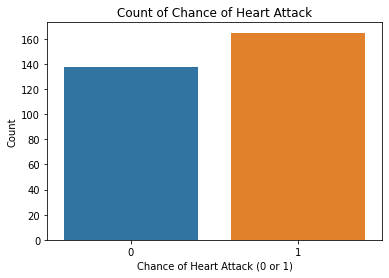

In [8]:
# visualization 1: viewing the count of chance of heart attack
# this gives me an effective summary of the data on chances of a heart attack (0 is less of a chance, 1 is a greater chance)
# this graph tells me that I have a bit more data on people with a greater chance of experiencing a heart attack; however, both sample sizes are significant enough to work with
sns.countplot(data['output'])
plt.xlabel('Chance of Heart Attack (0 or 1)')
plt.ylabel('Count')
plt.title('Count of Chance of Heart Attack')

Text(0.5, 1.0, 'Histogram with KDE of Maximum Heart Rate Achieved and Chance of Heart Attack')

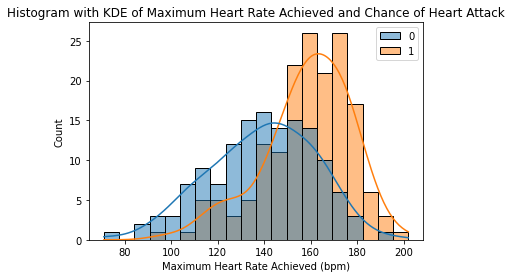

In [9]:
# visualization 2: viewing maximum heart rate and chance of heart attack
# this visualization shows the overlap, and therefore associations, between maximum heart rate and chance of heart attack
# the data on people with less of a chance of experiencing a heart attack (0) seems to have more variance compared to those with a greater chance (1) and it seems as though these two distributions are centered around different points
# this makes me think that the relationship between maximum heart rate achieved and chance of heart attack is worth examining
X =  np.array(data['thalachh']).flatten()
y = np.array(data['output'])
sns.histplot(x = X, hue = y, bins = 20, kde = True)
plt.xlabel('Maximum Heart Rate Achieved (bpm)')
plt.ylabel('Count')
plt.title('Histogram with KDE of Maximum Heart Rate Achieved and Chance of Heart Attack')

Text(0.5, 1.0, 'Histogram with KDE of Cholesterol and Chance of Heart Attack')

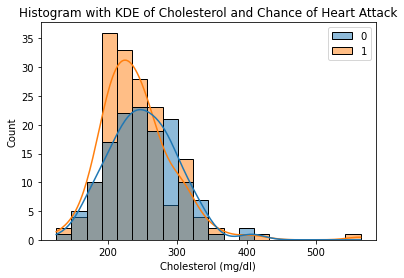

In [10]:
# visualization 3: viewing cholesterol and chance of heart attack
# this visualization shows the overlap, and therefore associations, between cholesterol and chance of heart attack
# it seems as though the data for both people with a lower and greater chance of experiencing a heart attack have similar distributions and are centered at similar points. i found this visualization very helpful because, logically, i thought that cholesterol would be a clear predictor for chance of heart attack
X =  np.array(data['chol']).flatten()
y = np.array(data['output'])
sns.histplot(x = X, hue= y, bins=20, kde=True)
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Count')
plt.title('Histogram with KDE of Cholesterol and Chance of Heart Attack')

Text(0.5, 1.0, 'Histogram with KDE of Age and Chance of Heart Attack')

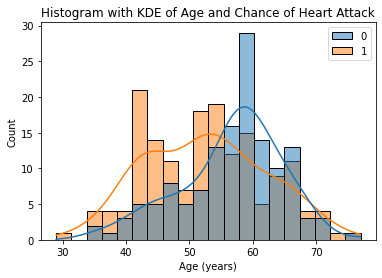

In [11]:
# visualization 4: viewing age and chance of heart attack
# this visualization shows the overlap, and therefore associations, between age and chance of heart attack
# at first glance, there is a lot more variance in the age data compared to my previous histograms. the graphs for 0 and 1 aren't really normally distributed, but the difference between the two makes me think that age would be an important predictor for my machine learning model
X =  np.array(data['age']).flatten()
y = np.array(data['output'])
sns.histplot(x = X, hue= y, bins=20, kde=True)
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Histogram with KDE of Age and Chance of Heart Attack')

Text(0.5, 1.0, 'Boxplots of ST Depression Induced by Exercise Relative to Rest (Oldpeak) and Chance of Heart Attack')

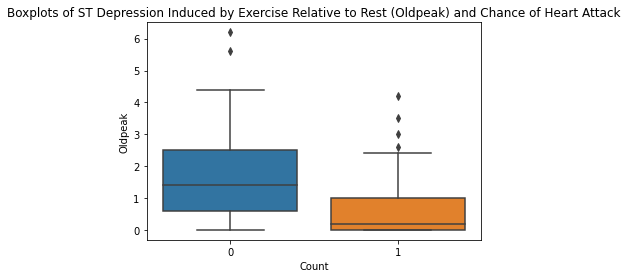

In [12]:
# visualization 5: viewing oldpeak and chance of heart attack
# this gives me an effective summary of the data on ST depression induced by exercise relative to rest
# using a boxplot to visualize st depression induced by exercise shows me that there are a few outliers in this data that i will have to address later in my feature engineering section. there also seems to be significant differences between the 0 and 1 graphs, so it may be a good idea to pass in this ==>
# ==> data to my machine learning model as well
sns.boxplot(x = 'output', y = 'oldpeak', data = data)
plt.xlabel('Count')
plt.ylabel('Oldpeak')
plt.title('Boxplots of ST Depression Induced by Exercise Relative to Rest (Oldpeak) and Chance of Heart Attack')

Text(0.5, 1.0, 'Histogram with KDE of Oldpeak and Chance of Heart Attack')

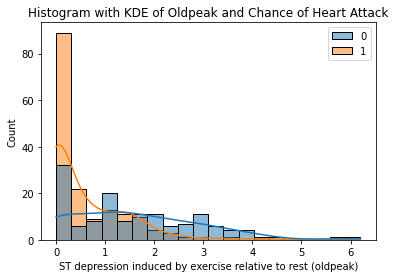

In [13]:
# visualization 6: viewing ST depression induced by exercise relative to rest and chance of heart attack
# this visualization shows the overlap, and therefore associations, between ST depression induced by exercise relative to rest and chance of heart attack
# while boxplots are useful for visualizing outliers, i find that i have an easier time examining the degree of differences between the 0 and 1 graphs when using a histogram. this visualization is particularly helpful because the kde line shows just how sharp the difference is between the 0 and 1 graphs. ==> 
# ==> i will definitely be passing this into my machine learning model
X =  np.array(data['oldpeak']).flatten()
y = np.array(data['output'])
sns.histplot(x = X, hue= y, bins=20, kde=True)
plt.xlabel('ST depression induced by exercise relative to rest (oldpeak)')
plt.ylabel('Count')
plt.title('Histogram with KDE of Oldpeak and Chance of Heart Attack')

Text(0.5, 1.0, 'Histogram of Major blood vessels colored by flouroscopy and Chance of Heart Attack')

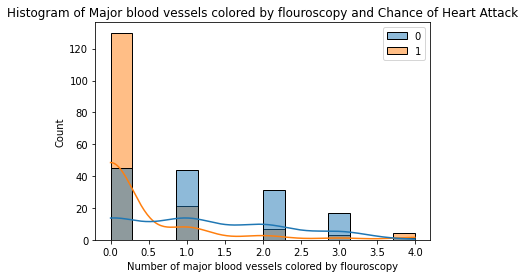

In [14]:
# visualization 7: viewing number of major blood vessels colored by flouroscopy and chance of heart attack
# this visualization shows the overlap, and therefore associations, between the number of major vessels colored by flouroscopy and chance of heart attack
# originally, i  wanted to only look at continuous variables in my data; however, the differences in distributions of the data for the major blood vessels leads me to believe that this would be valuable to pass into my model as well. not only are the 0 and 1 graphs centered on different points, the graph ==>
# ==> for 1 is also sharply skewed.
X =  np.array(data['caa']).flatten()
y = np.array(data['output'])
sns.histplot(x = X, hue = y, kde = True)
plt.xlabel('Number of major blood vessels colored by flouroscopy')
plt.ylabel('Count')
plt.title('Histogram of Major blood vessels colored by flouroscopy and Chance of Heart Attack')

***************
***************
# **Feature Engineering**

1. Use a heatmap to check for null values in my data
2. Confirm there are no null values using isnull.any
3. Check for duplicates and then take care of them using drop_duplicates
4. Check for string values
5. Split the data into 0 and 1
6. Visualizing outliers with boxplots
7. Remove outliers in data0 and data1 using my function
8. Making sure my function worked by re-visualizing with boxplots
9. Put the data back together
10. Use a heatmap to check for nulls again (because my function turned the outliers into NaNs)
11. Drop null values
12. Checking to make sure the nulls are gone

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool


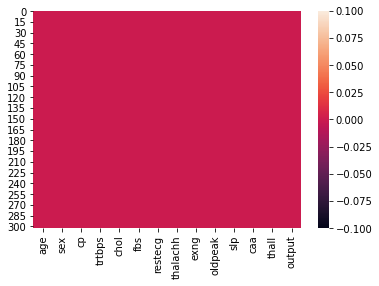

In [15]:
# Check and take care of null values
# this heatmap shows me that there are no null values in my dataset
sns.heatmap(data.isnull())
# I will manually check one more time to be sure
print(data.isnull().any())

In [16]:
# Check and take care of duplicates
# checking for duplicates
print(data.duplicated().any())
# dropping duplicates with drop_duplicates
data = data.drop_duplicates(keep = 'first')
# checking for duplicates
print(data.duplicated().any())

True
False


In [17]:
# Check and take care of string values
# Maximum Heart Rate Achieved has no strings in the data
print('Are there string values in Maximum Heart Rate Achieved? ', isinstance(np.asarray(data['thalachh']), str))
# Cholesterol has no strings in the data
print('Are there string values in Cholesterol? ', isinstance(np.array(data['chol']), str))
# Output has no strings in the data
print('Are there string values in Output? ', isinstance(np.asarray(data['output']), str))
# Oldpeak has no strings in the data
print('Are there string values in Oldpeak? ', isinstance(np.asarray(data['oldpeak']), str))
# CAA has no strings in the data
print('Are there string values in CAA? ', isinstance(np.asarray(data['caa']), str))

Are there string values in Maximum Heart Rate Achieved?  False
Are there string values in Cholesterol?  False
Are there string values in Output?  False
Are there string values in Oldpeak?  False
Are there string values in CAA?  False


In [18]:
# Check and take care of outliers
# my visualizations showed me that there are a lot of differences between the two splits of the data. if i just removed outliers from the entire dataset, i run the risk of losing valuable information about the data; therefore, i split the data before removing the outliers
data0 = data.loc[data['output'] == 0]
data1 = data.loc[data['output'] == 1]

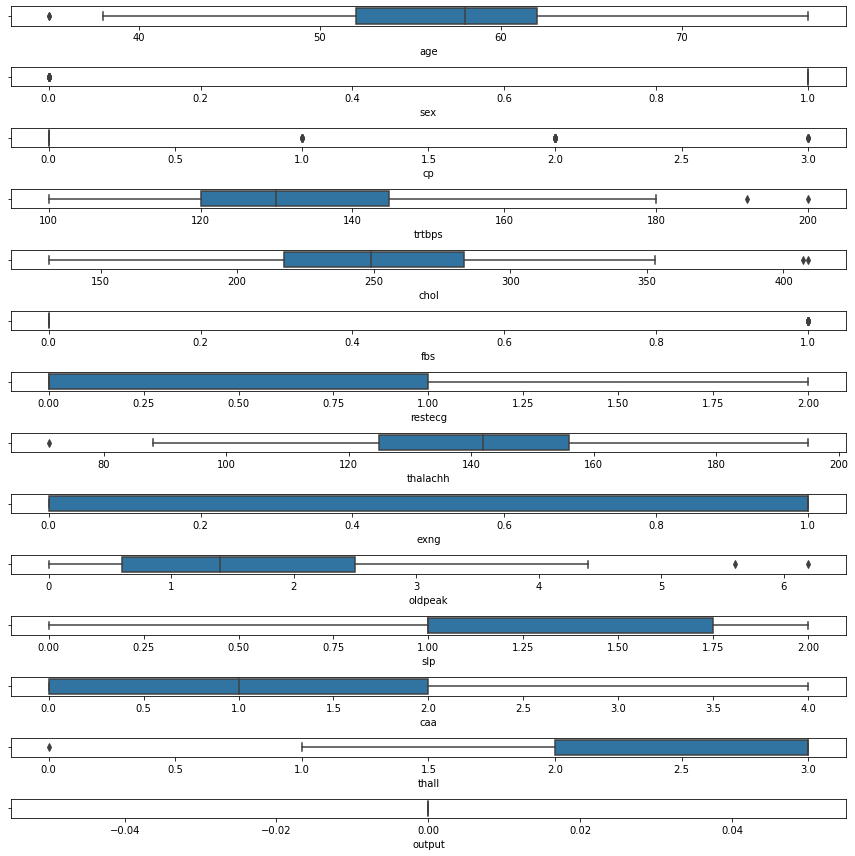

In [19]:
# visualize the outliers in data0
fig, axes = plt.subplots(14, 1, figsize = (12, 12))
count = 0

for column in data0.columns:
  sns.boxplot(x = data0[column], ax = axes[count])
  count += 1

plt.tight_layout()

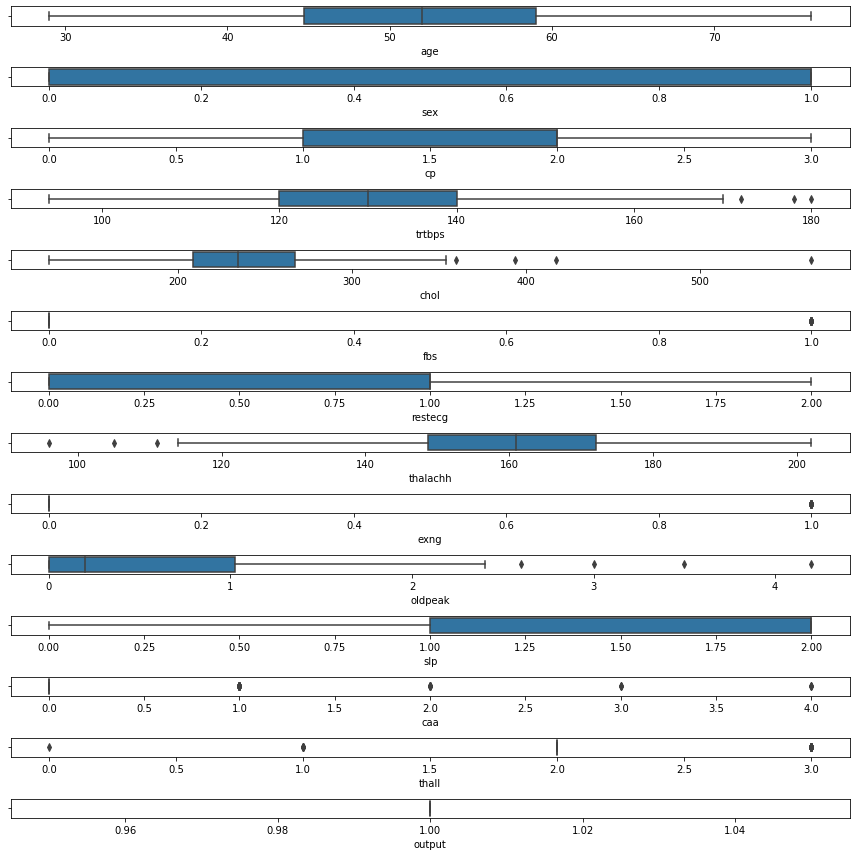

In [20]:
# visualize the data in data1
fig, axes = plt.subplots(14, 1, figsize = (12, 12))
count = 0

for column in data1.columns:
  sns.boxplot(x = data1[column], ax = axes[count])
  count += 1

plt.tight_layout()

In [21]:
# use my function to remove outliers in data0
for column in data0.columns:
  # since some of my data is not contiuous, i check the length to make sure my function only loops through continuous variables
  if len(data0[column].unique().tolist()) >= 10:
    # running this code gives me a deprecation notice. i worked on this with andrew and changed my code a couple of times, but the notice still pops up. luckily, the function seems to be working fine
    data0[column] = remove_outliers(data0[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [22]:
# use my function to remove outliers in data1
for column in data1.columns:
  # since some of my data is not contiuous, i check the length to make sure my function only loops through continuous variables
  if len(data1[column].unique().tolist()) >= 10:
    # running this code gives me a deprecation notice. i worked on this with andrew and changed my code a couple of times, but the notice still pops up. luckily, the function seems to be working fine
    data1[column] = remove_outliers(data1[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

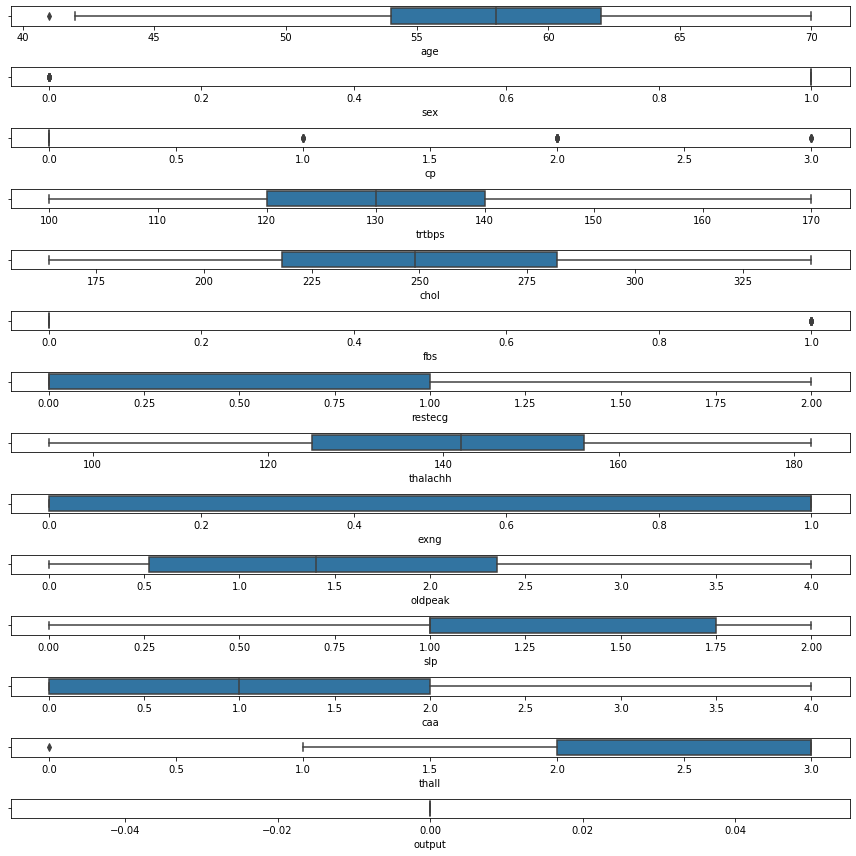

In [23]:
# check data0 again to make sure outliers were removed
fig, axes = plt.subplots(14, 1, figsize = (12, 12))
count = 0

for column in data0.columns:
  sns.boxplot(x = data0[column], ax = axes[count])
  count += 1

plt.tight_layout()

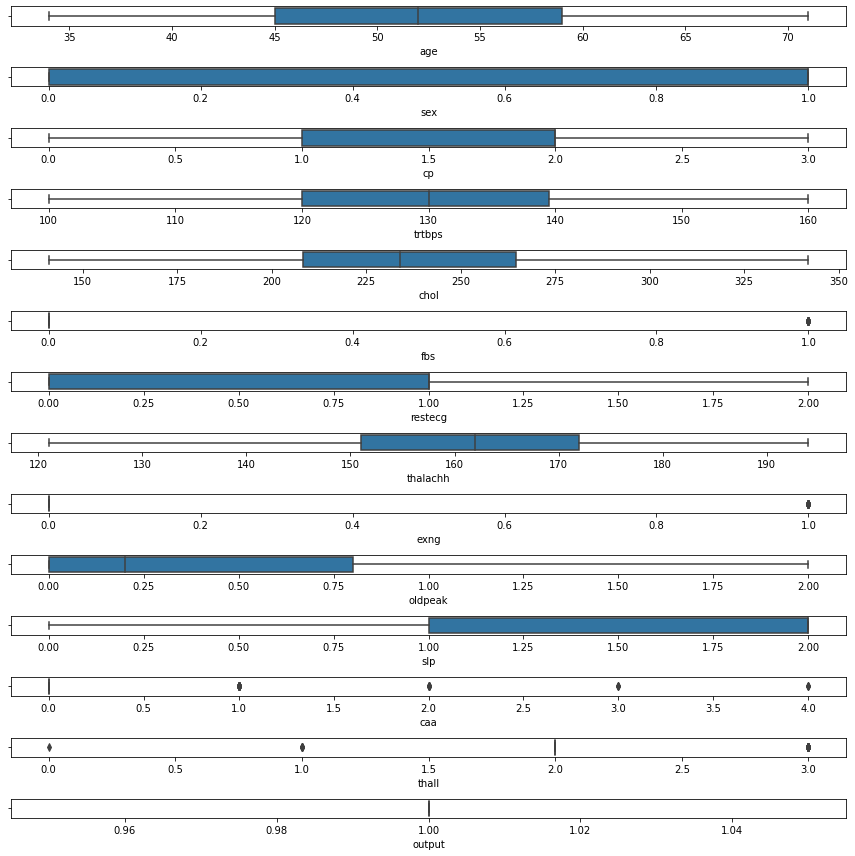

In [24]:
# check data1 again to make sure outliers were removed
fig, axes = plt.subplots(14, 1, figsize = (12, 12))
count = 0

for column in data1.columns:
  sns.boxplot(x = data1[column], ax = axes[count])
  count += 1

plt.tight_layout()

In [25]:
# recombine data0 and data1 
data = pd.concat([data0, data1], axis = 0)

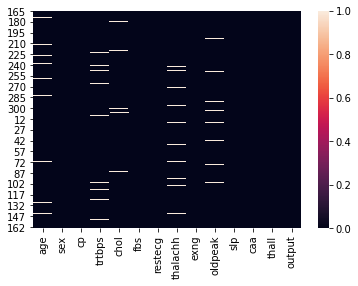

In [26]:
# checking for nulls again using a heatmap because my function turned the outliers into nulls
sns.heatmap(data.isnull())

In [27]:
# dropping the null values
data = data.dropna(how = 'any')

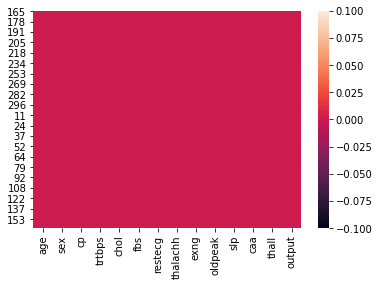

In [28]:
# checking the heatmap again to make sure the nulls are gone
sns.heatmap(data.isnull())

***************
***************
# **Analysis section**

### Machine Learning 1: K-Fold (4 x values, including Age)

1. Defining my X and y values
2. Training my k-fold model with 5 folds
3. Pass in my model (Logistic Regression)
4. Find each fold's testing values according to the k-fold model
5. Finding the f1 and accuracy score for each fold
6. Printing the mean and standard deviation of the testing values
7. Printing the train and test f1 and accuracy scores
8. Train test split in order to later compare my models


### Machine Learning 2: K-Fold (4 x values, including CAA)
1. Defining my X and y values
2. Training my k-fold model with 5 folds
3. Pass in my model (Logistic Regression)
4. Find each fold's testing values according to the k-fold model
5. Finding the f1 and accuracy score for each fold
6. Printing the mean and standard deviation of the testing values
7. Printing the train and test f1 and accuracy scores
8. Train test split in order to later compare my models


### Machine Learning 3: K-Fold (1 x value, just Age)
1. Defining my X and y values
2. Training my k-fold model with 5 folds
3. Pass in my model (Logistic Regression)
4. Find each fold's testing values according to the k-fold model
5. Finding the f1 and accuracy score for each fold
6. Printing the mean and standard deviation of the testing values
7. Printing the train and test f1 and accuracy scores
8. Train test split in order to later compare my models


### Machine Learning 4: Decision Tree
1. Defining my X and y values
2. Training my k-fold model with 5 folds
3. Pass in my model (Logistic Regression)
4. Find each fold's testing values according to the k-fold model
5. Finding the f1 and accuracy score for each fold
6. Printing the mean and standard deviation of the testing values
7. Printing the train and test f1 and accuracy scores
8. Train test split in order to later compare my models

### Machine Learning 5: K-Fold (all columns)
1. Defining my X and y values
2. Training my k-fold model with 5 folds
3. Pass in my model (Logistic Regression)
4. Find each fold's testing values according to the k-fold model
5. Finding the f1 and accuracy score for each fold
6. Printing the mean and standard deviation of the testing values
7. Printing the train and test f1 and accuracy scores
8. Train test split in order to later compare my models

### Block 6: Summarizing the scores of all models (performed these steps 5 times)
1. Pass in the model (Logistic Regression for model 1-3, 5 and Decision Tree for model 4)
2. Fit the model according to the train test split (each previous model had a different number)
3. Print training
4. Print testing
5. Print the probability of the model's predicted values

### Block 7-9: Graphing my results
1. Using my function to graph my results, which returns:
* the best fit line on a scatterplot
* the R^2 values for training and testing
* the linear equation


### Block 10: Visualizing my results with a Decision Tree and ROC curve
1. Defining subplots
2. Passing in my decision tree model and fitting it according to its training values
3. Visualizing the decision tree
4. Using metrics to find my false and true positives
5. Visualizing my ROC curve on the second subplot

### Block 11: Visualizing my results with an ROC curve
1. Using metrics to find my false and true positives
2. Visualizing my ROC curve on the second subplot

In [29]:
# Machine Learning 1: using kfold and logistic regression to find the mean and std testing r^2 values
# i will pass in all continuous variables
X1 = data[['thalachh', 'oldpeak', 'chol', 'age']] 
y1 = data['output']

# experimented with splits and found 5 to have the best outputs
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state = 1)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X1, y1, cv=kfold)
f1accuracy = model_selection.cross_validate(model, X1, y1, cv=kfold,return_train_score=True, scoring=('f1','accuracy'))
print('The mean is: ', results.mean())
print('The standard deviation is: ', results.std())
print('The training f1 scores are: ', f1accuracy['train_f1'])
print('The testing f1 scores are: ', f1accuracy['test_f1'])
print('The training accuracies are: ', f1accuracy['train_accuracy'])
print('The testing accuracies are: ', f1accuracy['test_accuracy'])

# performing train test split in order to later compare my models
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=1)
y_pred1 = model_selection.cross_val_predict(model, X1, y1, cv=kfold)

The mean is:  0.7530196078431373
The standard deviation is:  0.05133895024618104
The training f1 scores are:  [0.8        0.78632479 0.78899083 0.80833333 0.7860262 ]
The testing f1 scores are:  [0.76363636 0.82142857 0.73333333 0.73076923 0.85245902]
The training accuracies are:  [0.77       0.75124378 0.77114428 0.77114428 0.75621891]
The testing accuracies are:  [0.74509804 0.8        0.68       0.72       0.82      ]


In [30]:
# Machine Learning 2: using kfold and logistic regression to find the mean and std testing r^2 values
# i will switch age with caa 
X2 = data[['thalachh', 'oldpeak', 'chol', 'caa']] 
y2 = data['output']

kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state = 1)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X2, y2, cv=kfold)
f1accuracy = model_selection.cross_validate(model, X2, y2, cv=kfold,return_train_score=True, scoring=('f1','accuracy'))

print('The mean is: ', results.mean())
print('The standard deviation is: ', results.std())
print('The training f1 scores are: ', f1accuracy['train_f1'])
print('The testing f1 scores are: ', f1accuracy['test_f1'])
print('The training accuracies are: ', f1accuracy['train_accuracy'])
print('The testing accuracies are: ', f1accuracy['test_accuracy'])

# performing train test split in order to later compare my models
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=1)
y_pred2 = model_selection.cross_val_predict(model, X2, y2, cv=kfold)

The mean is:  0.7809411764705881
The standard deviation is:  0.016908465151267493
The training f1 scores are:  [0.8185654  0.81545064 0.8        0.82008368 0.8125    ]
The testing f1 scores are:  [0.79310345 0.82142857 0.81818182 0.78431373 0.83333333]
The training accuracies are:  [0.785      0.78606965 0.78109453 0.78606965 0.79104478]
The testing accuracies are:  [0.76470588 0.8        0.76       0.78       0.8       ]


In [31]:
# Machine Learning 3: using kfold and logistic regression to find the mean and std testing r^2 values 
# to look at why age might be performing worse than just caa, i will create a kfold model with just age
X3 = data[['age']]
y3 = data['output']

kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state = 1)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X3, y3, cv=kfold)
f1accuracy = model_selection.cross_validate(model, X3, y3, cv=kfold,return_train_score=True, scoring=('f1','accuracy'))

print('The mean is: ', results.mean())
print('The standard deviation is: ', results.std())
print('The training f1 scores are: ', f1accuracy['train_f1'])
print('The testing f1 scores are: ', f1accuracy['test_f1'])
print('The training accuracies are: ', f1accuracy['train_accuracy'])
print('The testing accuracies are: ', f1accuracy['test_accuracy'])

# performing train test split in order to later compare my models
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=1)
y_pred3 = model_selection.cross_val_predict(model, X3, y3, cv=kfold)

The mean is:  0.6656470588235294
The standard deviation is:  0.07770550385088382
The training f1 scores are:  [0.72727273 0.70386266 0.71428571 0.70833333 0.68493151]
The testing f1 scores are:  [0.6440678  0.73684211 0.62068966 0.72       0.79310345]
The training accuracies are:  [0.685      0.65671642 0.70149254 0.65174129 0.65671642]
The testing accuracies are:  [0.58823529 0.7        0.56       0.72       0.76      ]


In [32]:
# Machine Learning 4: using decision tree classification to find the mean and std testing r^2 values
X4 = data[['thalachh', 'oldpeak', 'chol', 'caa']]
y4 = data['output']
kfold2 = model_selection.KFold(n_splits=5, shuffle=True, random_state = 1)

# finding the best predicting max_depth
testingr2 = []
for i in range (1,21):
  model = tree.DecisionTreeClassifier(max_depth = i)
  results = model_selection.cross_val_score(model, X4, y4, cv=kfold2)
  results_mean = np.mean(results)
  testingr2.append(results_mean)
print(testingr2)

# the best predicting max_depth is 2
model2 = tree.DecisionTreeClassifier(max_depth = 2)
results2 = model_selection.cross_val_score(model, X4, y4, cv=kfold2)
f1accuracy = model_selection.cross_validate(model, X4, y4, cv=kfold,return_train_score=True, scoring=('f1','accuracy'))

print('The mean is: ', results2.mean())
print('The standard deviation is: ', results2.std())
print('The training f1 scores are: ', f1accuracy['train_f1'])
print('The testing f1 scores are: ', f1accuracy['test_f1'])
print('The training accuracies are: ', f1accuracy['train_accuracy'])
print('The testing accuracies are: ', f1accuracy['test_accuracy'])

# performing train test split in order to later compare my models
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, random_state=1)
y_pred4 = model_selection.cross_val_predict(model, X4, y4, cv=kfold)

[0.7250980392156862, 0.7730196078431373, 0.7609411764705882, 0.7609411764705882, 0.7848627450980393, 0.7450196078431371, 0.7134117647058824, 0.7569411764705881, 0.7410980392156863, 0.7250980392156863, 0.7330196078431372, 0.7291764705882352, 0.7410196078431371, 0.7450196078431374, 0.7291764705882352, 0.7410980392156864, 0.7250980392156864, 0.7410196078431373, 0.7330980392156864, 0.7570980392156862]
The mean is:  0.7330980392156862
The standard deviation is:  0.051327086604445675
The training f1 scores are:  [0.9955157  1.         0.99526066 1.         0.99534884]
The testing f1 scores are:  [0.76363636 0.82352941 0.74576271 0.70588235 0.78688525]
The training accuracies are:  [0.995      1.         0.99502488 1.         0.99502488]
The testing accuracies are:  [0.74509804 0.82       0.7        0.7        0.74      ]


In [33]:
# Machine Learning 5: using kfold and logistic regression to find the mean and std testing r^2 values 
# just out of curiosity, i passed in every single column
X5 = data[['age', 'sex', 'exng', 'caa', 'cp', 'trtbps', 'fbs', 'slp', 'thalachh', 'oldpeak', 'chol', 'age']] 
y5 = data['output']

kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state = 1)
# changed the max_iter from default 1000 to 1500 in order for the function to run properly
model = LogisticRegression(max_iter = 1500)
results = model_selection.cross_val_score(model, X5, y5, cv=kfold)
f1accuracy = model_selection.cross_validate(model, X5, y5, cv=kfold,return_train_score=True, scoring=('f1','accuracy'))

print('The mean is: ', results.mean())
print('The standard deviation is: ', results.std())
print('The training f1 scores are: ', f1accuracy['train_f1'])
print('The testing f1 scores are: ', f1accuracy['test_f1'])
print('The training accuracies are: ', f1accuracy['train_accuracy'])
print('The testing accuracies are: ', f1accuracy['test_accuracy'])

# performing train test split in order to later compare my models
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, random_state=1)
y_pred5 = model_selection.cross_val_predict(model, X5, y5, cv=kfold)

The mean is:  0.8207843137254901
The standard deviation is:  0.043486642122154716
The training f1 scores are:  [0.88793103 0.86206897 0.85321101 0.88607595 0.85964912]
The testing f1 scores are:  [0.82758621 0.89655172 0.89552239 0.75       0.81481481]
The training accuracies are:  [0.87       0.84079602 0.84079602 0.86567164 0.84079602]
The testing accuracies are:  [0.80392157 0.88       0.86       0.76       0.8       ]


In [34]:
# summarizing the scores of all models
# model 1
# defining logit model
logit_model = LogisticRegression(fit_intercept = True, random_state = 1)
logit_model1 = logit_model.fit(X_train1, y_train1)
# printing scores
print('Model 1 training: ', logit_model.score(X_train1, y_train1)) 
print('Model 1 testing: ', logit_model.score(X_test1, y_test1))
print('Model 1 mean of probability: ', logit_model.predict_proba(X_test1).mean())

# model 2
# defining logit model
logit_model = LogisticRegression(fit_intercept = True, random_state = 1)
logit_model2 = logit_model.fit(X_train2, y_train2)
# printing scores
print('Model 2 training: ', logit_model.score(X_train2, y_train2)) 
print('Model 2 testing: ', logit_model.score(X_test2, y_test2))
print('Model 2 mean of probability: ', logit_model.predict_proba(X_test2).mean())

# model 3
# defining logit model
logit_model = LogisticRegression(fit_intercept = True, random_state = 1)
logit_model3 = logit_model.fit(X_train3, y_train3)
# printing scores
print('Model 3 training: ', logit_model.score(X_train3, y_train3)) 
print('Model 3 testing: ', logit_model.score(X_test3, y_test3))
print('Model 3 mean of probability: ', logit_model.predict_proba(X_test3).mean())

# model 4
# defining tree model
tree_model = tree.DecisionTreeClassifier(max_depth = 1) 
tree_model = tree_model.fit(X_train4, y_train4)
# printing scores
print('Model 4 training: ', tree_model.score(X_train4, y_train4)) 
print('Model 4 testing: ', tree_model.score(X_test4, y_test4))
print('Model 4 mean of probability: ', tree_model.predict_proba(X_test4).mean())
# model 5
# defining logit model
logit_model = LogisticRegression(fit_intercept = True, random_state = 1, max_iter = 1500)
logit_model5 = logit_model.fit(X_train5, y_train5)
# printing scores
print('Model 5 training: ', logit_model.score(X_train5, y_train5)) 
print('Model 5 testing: ', logit_model.score(X_test5, y_test5))
print('Model 5 mean of probability: ', logit_model.predict_proba(X_test5).mean())

Model 1 training:  0.7553191489361702
Model 1 testing:  0.7619047619047619
Model 1 mean of probability:  0.49999999999999994
Model 2 training:  0.7819148936170213
Model 2 testing:  0.7777777777777778
Model 2 mean of probability:  0.4999999999999999
Model 3 training:  0.675531914893617
Model 3 testing:  0.6349206349206349
Model 3 mean of probability:  0.5
Model 4 training:  0.75
Model 4 testing:  0.746031746031746
Model 4 mean of probability:  0.5
Model 5 training:  0.8776595744680851
Model 5 testing:  0.7936507936507936
Model 5 mean of probability:  0.5


Training R^2 0.37693549184506986
Testing R^2 0.2891784811151423
y =    0.007*thalachh +  -0.16*oldpeak +  -0.001*chol +  -0.008*age +    0.33


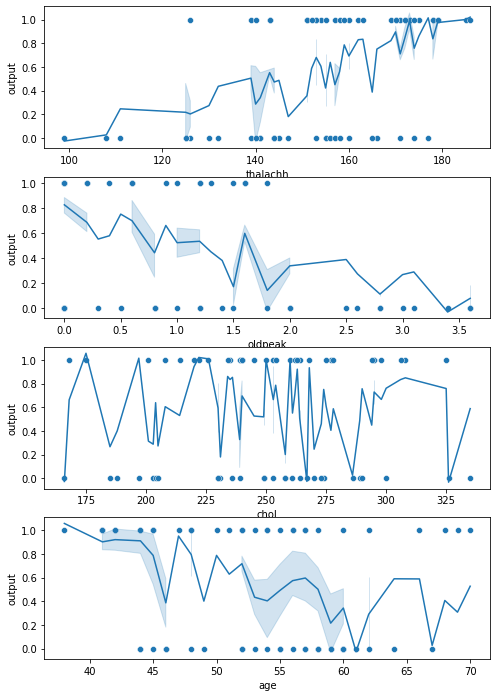

In [35]:
# model 1 graph
# i ran into some trouble trying to graph roc curves for my kfold models, so i decided to visualize my results with scatterplots instead
model_data(X1, y1)

Training R^2 0.41285156597395284
Testing R^2 0.34471990968025457
y =    0.007*thalachh +  -0.15*oldpeak +  -0.001*chol +  -0.117*caa +    -0.029


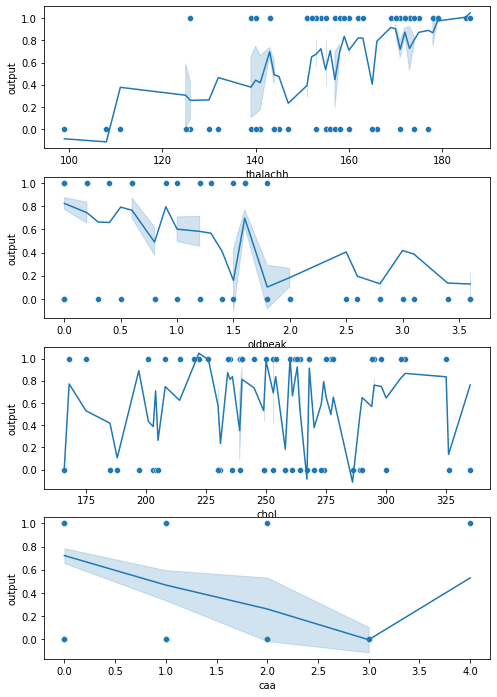

In [36]:
# model 2 graph
# i ran into some trouble trying to graph roc curves for my kfold models, so i decided to visualize my results with scatterplots instead
model_data(X2, y2)

Training R^2 0.1282324010951279
Testing R^2 0.038519222015491295


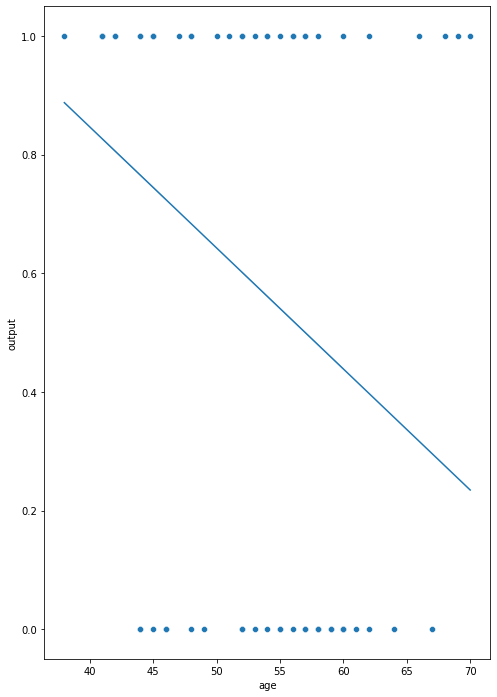

In [37]:
# model 3 graph
# i ran into some trouble trying to graph roc curves for my kfold models, so i decided to visualize my results with scatterplots instead
model_data(X3, y3)

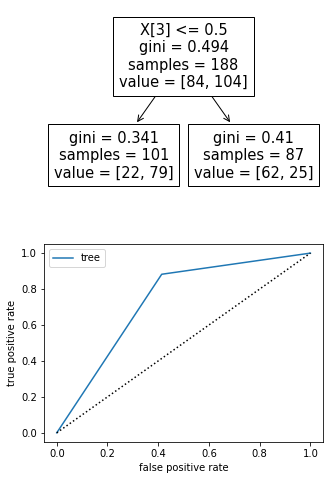

In [38]:
# model 4 visual
# since i had some difficulty deciding how to model my decision tree, i decided to visualize my findings with an actual decision tree and an roc curve
# defining subplots
fig, axes = plt.subplots(2, 1, figsize = [5, 8])
# decision tree 
tree_model = tree.DecisionTreeClassifier(max_depth = 1) 
tree_model = tree_model.fit(X_train4, y_train4)
tree.plot_tree(tree_model, ax = axes[0])
# roc curve
fpr_tree,tpr_tree,thresholds_tree = metrics.roc_curve(y_test4, tree_model.predict_proba(X_test4)[:,1])

plt.plot(fpr_tree,tpr_tree,label='tree')

plt.plot([0,1],[0,1],color=[0,0,0],linestyle=':')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()

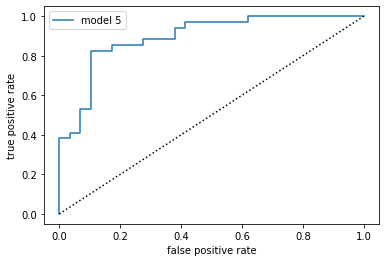

In [39]:
# model 5 graph
# my fifth model kept giving me error codes throughout my project because of how many predictors i was trying to pass into the model. predictably and understandably, the model didn't like it when i tried to graph it like i graphed my other kfold models. my solution to this was to also graph the roc curve ==>
# ==> for this model. it makes sense that it is pulled extremely high to the upper left corner because i passed in every single available predictor
fpr_logit,tpr_logit,thresholds_logit = metrics.roc_curve(y_test5, logit_model.predict_proba(X_test5)[:,1])
plt.plot(fpr_logit, tpr_logit, label = 'model 5')


plt.plot([0,1],[0,1],color=[0,0,0],linestyle=':')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()

***************
***************
# **Conclusions**

My analysis of the Heart Attack Analysis & Prediction Dataset shows me that there is a significant correlation between Maximum Heart Rate Achieved, ST depression induced by exercise relative to rest, Cholesterol, Age, the Number of major blood vessels colored by flouroscopy, and the likelihood that one will experience a heart attack (0 = lesser chance, 1 = greater chance). When I first approached this dataset, I wanted to figure out what the single best predictor was for that chance (Output). However after graphing my data, it seemed  pragmatic to instead pass multiple predictors into various models. Though it was the first step, I experienced some difficulties with visualizing my data; it took a while for me to both find descriptive graphs and to interpret my graphs. However, once I finished, I found that my visualizations were critical in facilitating my understanding of the rest of my project.

---

My visualizations helped me get a better understanding of the distribution of my data and the differences between the data when the chance of a heart attack was lower versus higher, ultimately guiding the splitting of my data by the Output column (0 or 1 depending on the likelihood of experiencing a heart attack) before removing outliers. 


---

Originally, I assumed that contiuous variables would provide the most details, and therefore train a more accurate model; however, I was surpised to see that, despite the graph leading to me to believe otherwise, Age was a pretty poor predictor of whether or not a person is likely to experience a heart attack. I confirmed that conclusion by fitting a model using only Age as a predictor, and the low mean and high standard deviation (the standard deviation was not extremely high, but it was a bit higher than the rest of my models) suggests that Age is a poor and unreliable predictor of Output. 

---

Therefore, though I was initially inclined to believe that Age would be one of the best predictors to pass into my model, my testing values ending up improving when I switched Age out for the Number of major blood vessels colored by flouroscopy (CAA). I later tested the accuracy of my results by passing these 4 best predictors into a Decision Tree model. Although the testing value mean decreased, it was still pretty high with a low standard deviation; this meant that it was still a pretty accurate result.

---

Ultimately, my visualizations and model suggest that the variables in my dataset are all pretty correlated; so I finally decided to create a fifth model using all the predictors. As expected, this returned the highest training and testing scores -- also visualized with the sharp pull toward the upper left corner in the final ROC curve graph. In terms of my original curiosity: I did not find a single accurate predictor, but some predictors performed better than others (like my change from Age to CAA). Other predictors would probably be more valuable in guiding an accurate analysis of this dataset in determining an individual's likelihood of experiencing a heart attack. 